#                                    Logistic Regression Using Tensorflow

### Importing the necessary packages

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
logs_path = '/tmp/tensorflow_summary/logs'

### Importing The data

In [3]:
data = np.transpose(np.loadtxt("ex2data1.txt", delimiter=','))
print("Shape of data : ", data.shape)
data_x = np.hstack((np.ones((data.shape[1],1)), 
                    (data[0]/np.max(data[0])).reshape(data.shape[1],1), 
                    (data[1]/np.max(data[1])).reshape(data.shape[1],1)))
data_y = data[2].reshape(data.shape[1],1)
print("Input Sample : ",data_x[:5])
print("output Sample : ",data_y[:5])

Shape of data :  (3, 100)
Input Sample :  [[1.         0.34683364 0.78916899]
 [1.         0.30338937 0.44396933]
 [1.         0.35909224 0.73735829]
 [1.         0.60286378 0.87295484]
 [1.         0.79169019 0.76205933]]
output Sample :  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]]


### Shuffling and Partitioning the data into train and test sets

In [4]:
order = np.random.permutation(len(data_x))
portion = 30
test_x = data_x[order[:portion]]
test_y = data_y[order[:portion]]
train_x = data_x[order[portion:]]
train_y = data_y[order[portion:]]
print("No of Training Sample : ", train_x.shape)
print(np.unique(train_y, return_counts = True))
print(np.unique(test_y, return_counts = True))

No of Training Sample :  (70, 3)
(array([0., 1.]), array([31, 39], dtype=int64))
(array([0., 1.]), array([ 9, 21], dtype=int64))


### Defining the tensorflow graph.

In [5]:
input_ = tf.placeholder("float64",shape=(1,data.shape[0]), name='input')
output = tf.placeholder("float64",shape=(1,1), name='output')
weights = tf.placeholder("float64",shape=(data.shape[0],1), name='Weights')
lr = tf.constant(0.01,"float64", name='Learning_rate')

with tf.name_scope('Model'):
    y_pred = tf.sigmoid(tf.matmul(input_, weights))
with tf.name_scope('Loss'):
    loss = -(output*tf.log(y_pred)+(1-output)*tf.log(1-y_pred))
with tf.name_scope('opt'):
    grad = y_pred-output
with tf.name_scope('opt'):
    fin_weights = weights - lr*tf.matmul(tf.transpose(input_), grad)


### Running The tensorflow Graph

In [6]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    i = 0
    summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
    in_weights = np.random.randn(data.shape[0],1).reshape((data.shape[0],1))
    print(in_weights.shape)
    test_loss = []
    train_loss = []
    while i<500:
        res_train_loss = 0
        res_test_loss = 0
        for x,y in zip(train_x,train_y):
            #print(" Starting Iteration ",i," Sample ",x," Output ",y)
            in_weights = sess.run(fin_weights,feed_dict = {input_:[x], output:[y], weights:in_weights})
            #print(" Progressing Iteration ",i," Sample ",x," Output ",y)
            res_train_loss +=  loss.eval(feed_dict = {input_:[x], output:[y], weights:in_weights})/train_x.shape[0]
            #print(" Ending Iteration ",i," Sample ",x," Output ",y)
        test_pred=[]
        for x,y in zip(test_x,test_y):
            test_pred.append(1 if( sess.run(y_pred, feed_dict = {input_:[x], weights:in_weights}) ).reshape(1,) > 0.5 else 0)
            res_test_loss += loss.eval(feed_dict = {input_:[x], output:[y], weights:in_weights})/test_x.shape[0]
        i = i+1
        if (i%10 == 0):
            print("Loss at iteration ", i, " : ", res_train_loss)
            print("Average Loss on test data: ",res_test_loss)
        test_loss.append(res_test_loss)
        train_loss.append(res_train_loss)
        print("Weights After First Iteration : ", in_weights)
    final_weights = in_weights
print("Run the command line:\n" \
          "--> tensorboard --logdir=/tmp/tensorflow_summary " \
          "\nThen open http://0.0.0.0:6006/ into your web browser")

(3, 1)
Weights After First Iteration :  [[-0.06192664]
 [-0.42556752]
 [-0.02760097]]
Weights After First Iteration :  [[ 0.0172135 ]
 [-0.33355967]
 [ 0.05734711]]
Weights After First Iteration :  [[ 0.06760127]
 [-0.26091716]
 [ 0.12357911]]
Weights After First Iteration :  [[ 0.09705924]
 [-0.20243073]
 [ 0.17616154]]
Weights After First Iteration :  [[ 0.11142897]
 [-0.15419483]
 [ 0.21888228]]
Weights After First Iteration :  [[ 0.11494782]
 [-0.11337086]
 [ 0.2544892 ]]
Weights After First Iteration :  [[ 0.11065956]
 [-0.07791782]
 [ 0.28495544]]
Weights After First Iteration :  [[ 0.10074761]
 [-0.04637098]
 [ 0.31169572]]
Weights After First Iteration :  [[ 0.08678133]
 [-0.01767734]
 [ 0.33572637]]
Loss at iteration  10  :  [[0.66838245]]
Average Loss on test data:  [[0.62842665]]
Weights After First Iteration :  [[0.06989205]
 [0.00892226]
 [0.35777977]]
Weights After First Iteration :  [[0.05089778]
 [0.03397679]
 [0.37838526]]
Weights After First Iteration :  [[0.03039152]

Weights After First Iteration :  [[-1.84049956]
 [ 1.6246322 ]
 [ 1.73411774]]
Loss at iteration  100  :  [[0.535406]]
Average Loss on test data:  [[0.50012467]]
Weights After First Iteration :  [[-1.85933734]
 [ 1.63986707]
 [ 1.7479925 ]]
Weights After First Iteration :  [[-1.87811974]
 [ 1.65504992]
 [ 1.7618378 ]]
Weights After First Iteration :  [[-1.89684702]
 [ 1.67018102]
 [ 1.77565371]]
Weights After First Iteration :  [[-1.91551944]
 [ 1.68526066]
 [ 1.78944033]]
Weights After First Iteration :  [[-1.93413727]
 [ 1.70028912]
 [ 1.80319774]]
Weights After First Iteration :  [[-1.95270075]
 [ 1.71526665]
 [ 1.81692601]]
Weights After First Iteration :  [[-1.97121015]
 [ 1.73019355]
 [ 1.83062523]]
Weights After First Iteration :  [[-1.98966571]
 [ 1.74507007]
 [ 1.84429548]]
Weights After First Iteration :  [[-2.0080677 ]
 [ 1.75989649]
 [ 1.85793685]]
Weights After First Iteration :  [[-2.02641636]
 [ 1.77467308]
 [ 1.87154942]]
Loss at iteration  110  :  [[0.52465564]]
Averag

Weights After First Iteration :  [[-3.42993059]
 [ 2.88533441]
 [ 2.94337805]]
Weights After First Iteration :  [[-3.44448192]
 [ 2.89665715]
 [ 2.95479162]]
Weights After First Iteration :  [[-3.4589979 ]
 [ 2.90794872]
 [ 2.96618324]]
Weights After First Iteration :  [[-3.47347868]
 [ 2.91920929]
 [ 2.97755299]]
Weights After First Iteration :  [[-3.48792443]
 [ 2.930439  ]
 [ 2.98890094]]
Loss at iteration  200  :  [[0.45005557]]
Average Loss on test data:  [[0.42452242]]
Weights After First Iteration :  [[-3.5023353 ]
 [ 2.94163803]
 [ 3.00022715]]
Weights After First Iteration :  [[-3.51671145]
 [ 2.95280653]
 [ 3.0115317 ]]
Weights After First Iteration :  [[-3.53105303]
 [ 2.96394466]
 [ 3.02281465]]
Weights After First Iteration :  [[-3.5453602 ]
 [ 2.97505257]
 [ 3.03407608]]
Weights After First Iteration :  [[-3.55963311]
 [ 2.98613041]
 [ 3.04531604]]
Weights After First Iteration :  [[-3.57387192]
 [ 2.99717834]
 [ 3.05653462]]
Weights After First Iteration :  [[-3.58807677

Loss at iteration  290  :  [[0.40147509]]
Average Loss on test data:  [[0.38411101]]
Weights After First Iteration :  [[-4.67391942]
 [ 3.84118528]
 [ 3.93867635]]
Weights After First Iteration :  [[-4.68571404]
 [ 3.85014264]
 [ 3.9482875 ]]
Weights After First Iteration :  [[-4.69748507]
 [ 3.85908035]
 [ 3.9578824 ]]
Weights After First Iteration :  [[-4.70923259]
 [ 3.8679985 ]
 [ 3.96746108]]
Weights After First Iteration :  [[-4.7209567 ]
 [ 3.87689718]
 [ 3.97702361]]
Weights After First Iteration :  [[-4.7326575 ]
 [ 3.88577648]
 [ 3.98657002]]
Weights After First Iteration :  [[-4.74433508]
 [ 3.89463648]
 [ 3.99610037]]
Weights After First Iteration :  [[-4.75598952]
 [ 3.90347727]
 [ 4.00561471]]
Weights After First Iteration :  [[-4.76762092]
 [ 3.91229893]
 [ 4.01511308]]
Weights After First Iteration :  [[-4.77922937]
 [ 3.92110156]
 [ 4.02459554]]
Loss at iteration  300  :  [[0.3971158]]
Average Loss on test data:  [[0.38062291]]
Weights After First Iteration :  [[-4.790

Weights After First Iteration :  [[-5.70057239]
 [ 4.61514328]
 [ 4.78548717]]
Weights After First Iteration :  [[-5.71048249]
 [ 4.62256534]
 [ 4.79375268]]
Weights After First Iteration :  [[-5.72037602]
 [ 4.62997419]
 [ 4.80200592]]
Weights After First Iteration :  [[-5.73025303]
 [ 4.63736989]
 [ 4.81024693]]
Weights After First Iteration :  [[-5.74011357]
 [ 4.64475249]
 [ 4.81847575]]
Loss at iteration  390  :  [[0.36431689]]
Average Loss on test data:  [[0.35532228]]
Weights After First Iteration :  [[-5.7499577 ]
 [ 4.65212204]
 [ 4.8266924 ]]
Weights After First Iteration :  [[-5.75978548]
 [ 4.65947859]
 [ 4.83489693]]
Weights After First Iteration :  [[-5.76959696]
 [ 4.66682219]
 [ 4.84308936]]
Weights After First Iteration :  [[-5.7793922 ]
 [ 4.67415289]
 [ 4.85126974]]
Weights After First Iteration :  [[-5.78917126]
 [ 4.68147073]
 [ 4.85943809]]
Weights After First Iteration :  [[-5.79893418]
 [ 4.68877577]
 [ 4.86759446]]
Weights After First Iteration :  [[-5.80868103

Weights After First Iteration :  [[-6.58367152]
 [ 5.27388615]
 [ 5.52762912]]
Weights After First Iteration :  [[-6.59221564]
 [ 5.28023777]
 [ 5.53485931]]
Weights After First Iteration :  [[-6.6007476 ]
 [ 5.28658001]
 [ 5.54208007]]
Weights After First Iteration :  [[-6.60926744]
 [ 5.29291291]
 [ 5.5492914 ]]
Weights After First Iteration :  [[-6.61777519]
 [ 5.29923648]
 [ 5.55649335]]
Weights After First Iteration :  [[-6.62627089]
 [ 5.30555077]
 [ 5.56368594]]
Weights After First Iteration :  [[-6.63475457]
 [ 5.3118558 ]
 [ 5.57086918]]
Weights After First Iteration :  [[-6.64322627]
 [ 5.31815161]
 [ 5.57804311]]
Weights After First Iteration :  [[-6.65168603]
 [ 5.32443822]
 [ 5.58520774]]
Loss at iteration  490  :  [[0.33758203]]
Average Loss on test data:  [[0.33620417]]
Weights After First Iteration :  [[-6.66013388]
 [ 5.33071566]
 [ 5.5923631 ]]
Weights After First Iteration :  [[-6.66856985]
 [ 5.33698397]
 [ 5.59950922]]
Weights After First Iteration :  [[-6.67699399

In [7]:
print("Average Loss on test data: ",res_test_loss)
tp = 0
fp = 0
tn = 0
fn = 0
for x,y in zip(test_pred, test_y):
    print("Predicted value : ", x, "Actual value : ", y,"Predicted Correctly" if x==y else "Predicted Wrongly")
    if y==1:
        if x==y:
            tp += 1
        else:
            fp += 1
    else:
        if x==y:
            tn += 1
        else:
            fn += 1
print("True\tPositives\t:\t",tp,"\nFalse\tPositives\t:\t",fp,"\nFalse\tNegatives\t:\t",fn,"\nTrue\tNegatives\t:\t",tn)
print("Accuracy (tp+tn)/(fp+fn+tp+tn) : ",(tp+tn)/(fp+fn+tp+tn))
    

Average Loss on test data:  [[0.33465588]]
Predicted value :  1 Actual value :  [1.] Predicted Correctly
Predicted value :  1 Actual value :  [1.] Predicted Correctly
Predicted value :  1 Actual value :  [1.] Predicted Correctly
Predicted value :  1 Actual value :  [1.] Predicted Correctly
Predicted value :  1 Actual value :  [1.] Predicted Correctly
Predicted value :  1 Actual value :  [1.] Predicted Correctly
Predicted value :  0 Actual value :  [0.] Predicted Correctly
Predicted value :  0 Actual value :  [0.] Predicted Correctly
Predicted value :  0 Actual value :  [1.] Predicted Wrongly
Predicted value :  1 Actual value :  [1.] Predicted Correctly
Predicted value :  0 Actual value :  [0.] Predicted Correctly
Predicted value :  0 Actual value :  [0.] Predicted Correctly
Predicted value :  1 Actual value :  [0.] Predicted Wrongly
Predicted value :  1 Actual value :  [1.] Predicted Correctly
Predicted value :  1 Actual value :  [1.] Predicted Correctly
Predicted value :  1 Actual val

### Plotting Train and Test Loss

500 500


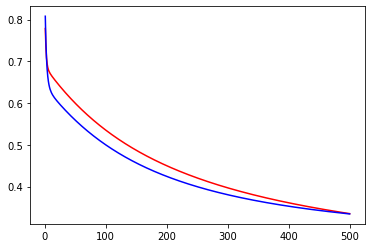

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline

print(len(train_loss), len(test_loss))
plt.plot(range(1,501,1),np.array(train_loss).reshape(500,1),c='r')
plt.plot(range(1,501,1),np.array(test_loss).reshape(500,1),c='b')